In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import math 
import random
from scipy.signal import resample

In [ ]:
train_df = pd.read_csv('/data/input/heartbeat/mitbih_train.csv',header=None)
test_df = pd.read_csv('/data/input/heartbeat/mitbih_test.csv',header=None)

In [ ]:
train_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
49854,0.980328,0.865574,0.481967,0.167213,0.121311,0.108197,0.091803,0.055738,0.062295,0.039344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70965,1.000000,0.488608,0.192405,0.121519,0.096203,0.050633,0.043038,0.053165,0.032911,0.025316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15178,1.000000,0.714634,0.163415,0.063415,0.090244,0.014634,0.026829,0.017073,0.017073,0.043902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84738,0.732006,0.655436,0.551302,0.437979,0.301685,0.168453,0.075038,0.024502,0.001531,0.033691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
52627,1.000000,0.640000,0.120000,0.072727,0.116364,0.101818,0.072727,0.047273,0.061818,0.072727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55506,0.887129,0.930693,0.566337,0.336634,0.285149,0.302970,0.265347,0.225743,0.172277,0.128713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28244,0.067961,0.189320,0.300971,0.441748,0.524272,0.485437,0.485437,0.509709,0.519417,0.480583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54425,0.917603,0.921348,0.689139,0.400749,0.086142,0.000000,0.101124,0.187266,0.243446,0.250936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69736,1.000000,0.856734,0.306590,0.000000,0.265043,0.303725,0.312321,0.322350,0.326648,0.328080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29780,0.827051,0.706208,0.369180,0.286031,0.364745,0.342572,0.307095,0.312639,0.312639,0.308204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Classes:['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
Classes = {
    0:'N', 
    1:'S', 
    2:'V', 
    3:'F',
    4:'Q'
}

Classes_index = {
    'N': 0, 
    'S': 1, 
    'V': 2, 
    'F': 3, 
    'Q': 4
}

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [ ]:
feat_cols_name = [i for i in range(train_df.shape[1]-1)]

train_df.columns = feat_cols_name+["label"]
test_df.columns = feat_cols_name+["label"]

In [ ]:
train_df["label"] = train_df["label"].astype(int)
test_df["label"] = test_df["label"].astype(int)

In [ ]:
train_df["label"] = train_df["label"].map(Classes)
test_df["label"] = test_df["label"].map(Classes)

In [ ]:
train_df.columns[train_df.isnull().sum() != 0]
test_df.columns[train_df.isnull().sum() != 0]

Index([], dtype='object')

In [ ]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


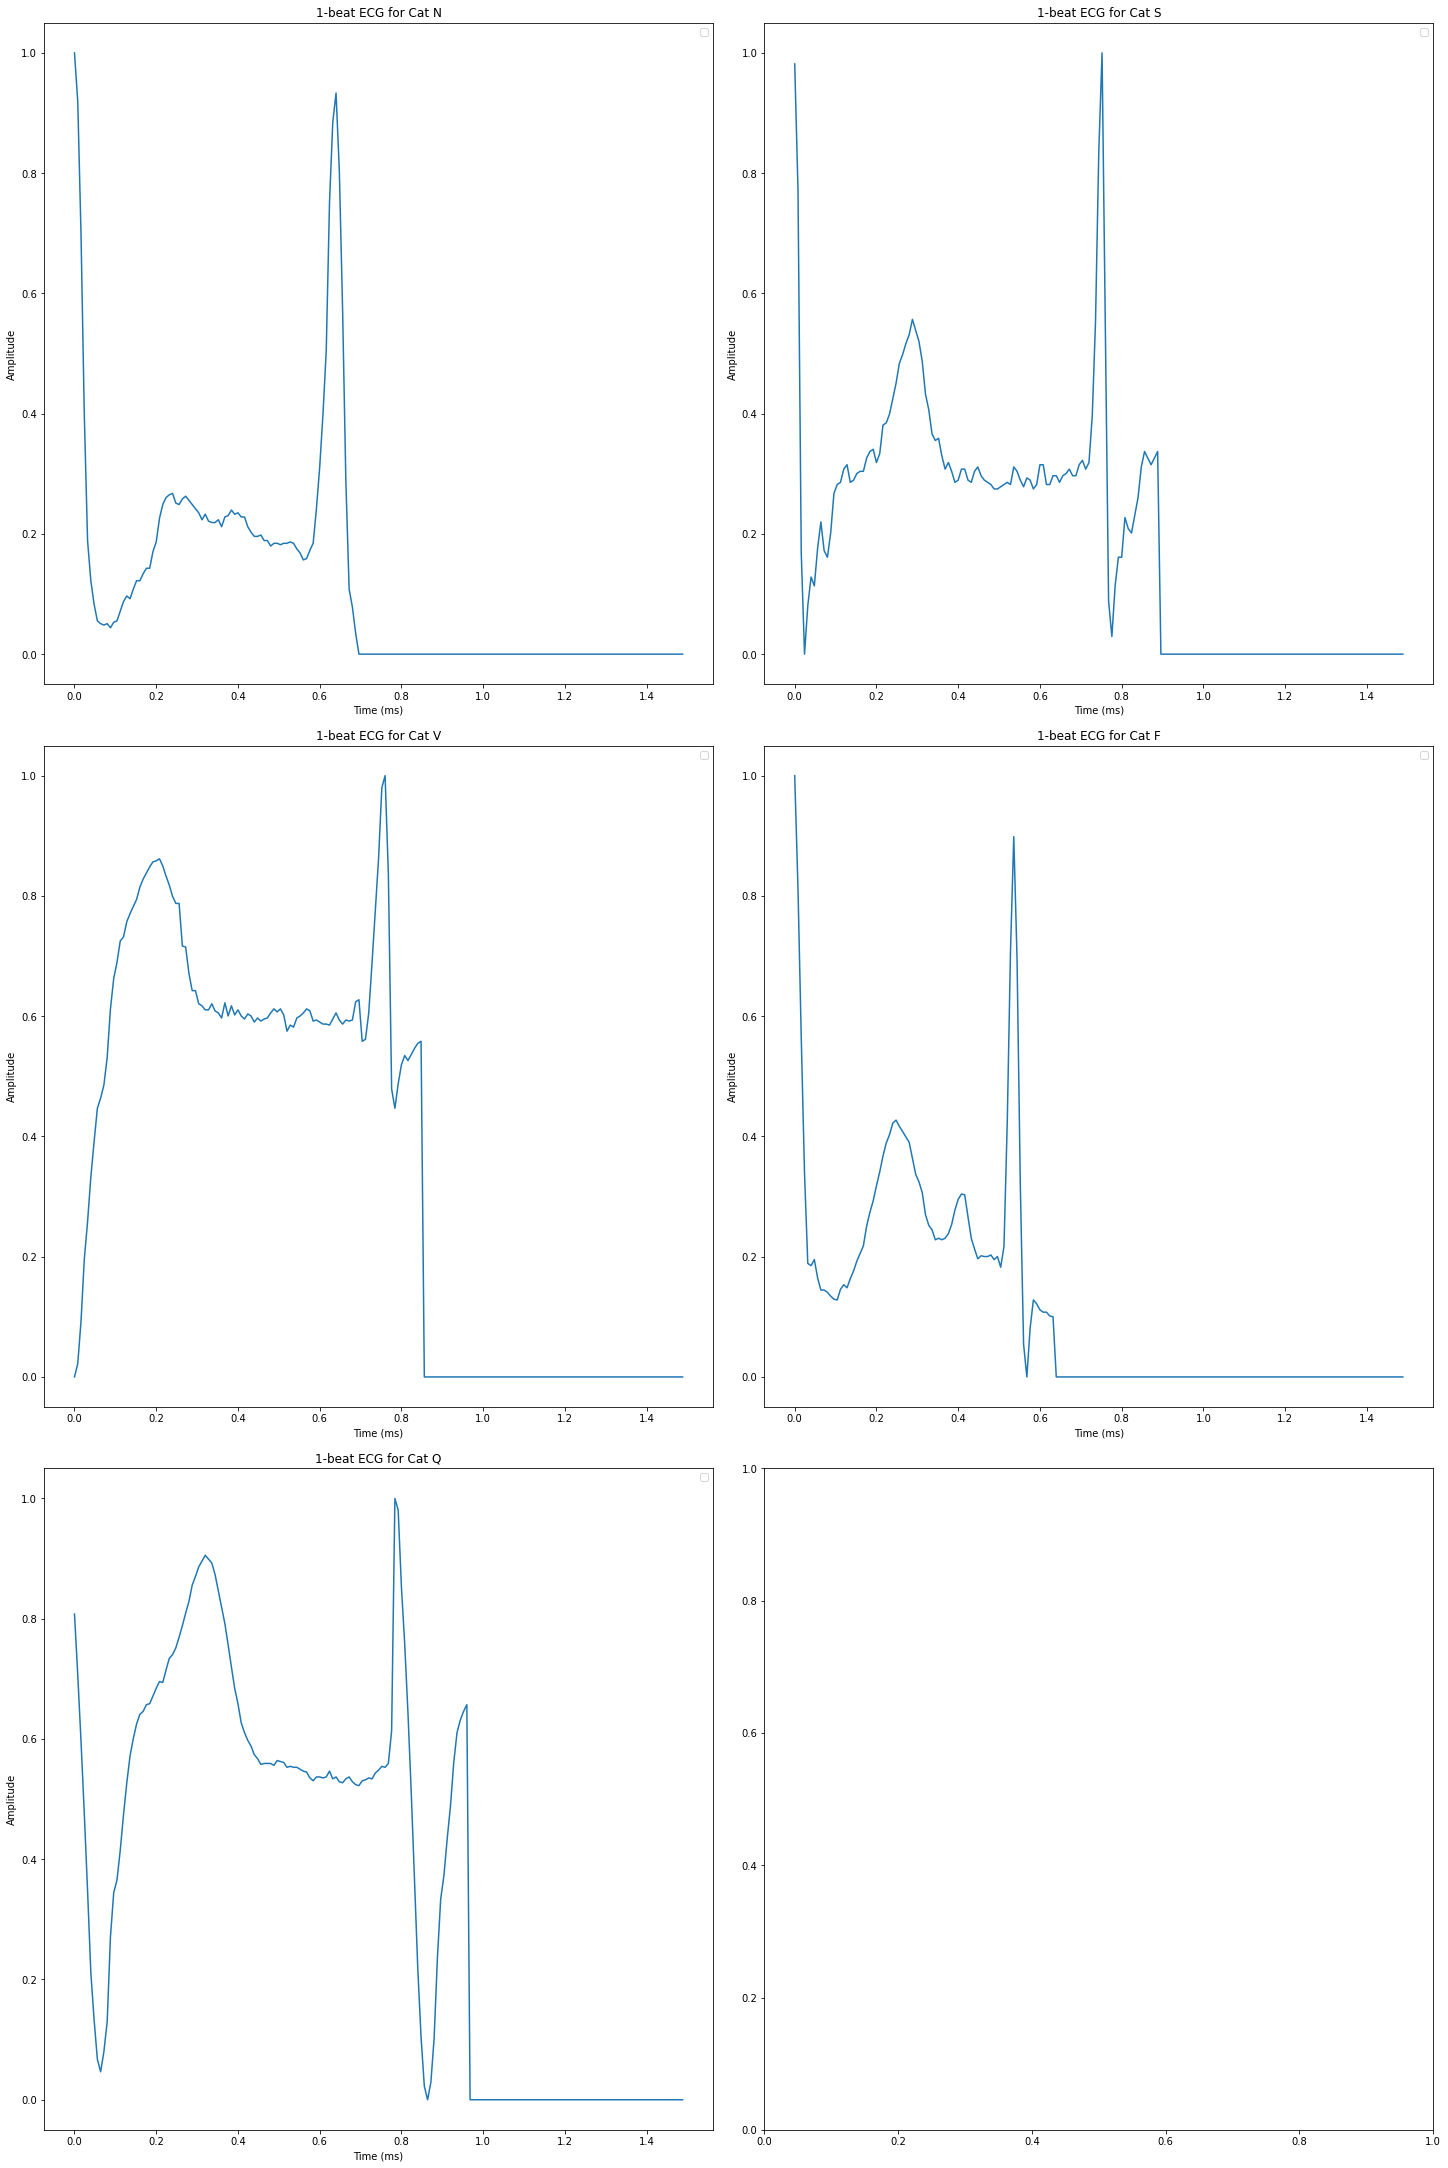

In [ ]:
fig, axes= plt.subplots(math.ceil(len(Classes_index.keys())/2), 2, figsize=(20,30), constrained_layout=True)
X = np.arange(0, len(feat_cols_name))*8/1000

i = 0
for key, value in Classes_index.items():
    ax = axes[int(i/2), i%2]
    ax.plot(X, train_df[train_df["label"] == key][feat_cols_name].sample(1).values.reshape(-1,1))
    ax.legend()
    ax.set(title="1-beat ECG for Cat {}".format(key))
    ax.set(ylabel="Amplitude")
    ax.set(xlabel="Time (ms)")
    i+=1

In [ ]:
def stretch(x):
    l = int(len(feat_cols_name) * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < len(feat_cols_name):
        y_ = np.zeros(shape=(len(feat_cols_name), ))
        y_[:l] = y
    else:
        y_ = y[:len(feat_cols_name)]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def gaussian_noise(signal):
    noise=np.random.normal(0,0.01, len(feat_cols_name))
    return (signal+noise)

def augment(x):
    result = np.zeros(shape= (4, len(feat_cols_name)))
    for i in range(3):
        if random.random() < 0.25:
            new_X = gaussian_noise(x)
        elif random.random() < 0.50:
            new_X = stretch(x)           
        elif random.random() < 0.75:
            new_X = amplify(x)
        else:
            new_X = gaussian_noise(x)
            new_X = stretch(new_X)
            new_X = amplify(new_X)
        result[i, :] = new_X
    return result

In [ ]:
train_df["label"] = train_df["label"].map(Classes_index)
test_df["label"] = test_df["label"].map(Classes_index)

In [ ]:
X_train = train_df[feat_cols_name].values
y_train = train_df["label"].values

X_test = test_df[feat_cols_name].values
y_test = test_df["label"].values

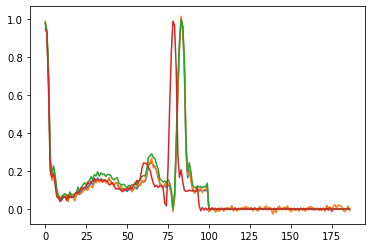

In [ ]:
plt.plot(X_train[0])
plt.plot(gaussian_noise(X_train[0]))
plt.plot(amplify(X_train[0]))
plt.plot(stretch(X_train[0]))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2, stratify=y_train)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((78798, 187), (78798,), (8756, 187), (8756,))

In [ ]:
tmp_X_train = X_train.copy()
tmp_y_train = y_train.copy()

X_train = []
y_train = []
for i in range(0, len(tmp_y_train)):
    augment_X = augment(tmp_X_train[i])
    augment_y = np.ones(shape=(augment_X.shape[0],), dtype=int)*tmp_y_train[i]

    X_train.extend(augment_X)
    y_train.extend(augment_y)
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((315192, 187), (315192,))

In [ ]:
X_train = X_train.reshape((-1, len(feat_cols_name), 1))
X_val = X_val.reshape((-1, len(feat_cols_name), 1))
X_test = X_test.reshape((-1, len(feat_cols_name), 1))

y_train = y_train.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [ ]:
input_shape = X_train.shape[1:]
nb_classes = len(Classes_index.keys())
input_shape, nb_classes

((187, 1), 5)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=nb_classes)
y_val = to_categorical(y_val, num_classes=nb_classes)
y_test = to_categorical(y_test, num_classes=nb_classes)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder],
                  columns = [i for i in label_encoder])
    plt.figure(figsize = (10,10))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder))

In [ ]:
!pip install livelossplot

In [ ]:
from keras.layers import Conv1D, MaxPool1D, Concatenate, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import time

In [ ]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
class Classifier_INCEPTION:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=100):
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs

        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):

        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(3)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    def build_model(self, input_shape, nb_classes):
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):

            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall(), f1_score])

        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train, 
                              batch_size=mini_batch_size, 
                              epochs=self.nb_epochs,
                              verbose=self.verbose, 
                              validation_data=(x_val, y_val), 
                              callbacks=self.callbacks)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist

In [ ]:
weights_directory = "./"
inception = Classifier_INCEPTION(weights_directory, input_shape, nb_classes, 1, 
                                 batch_size=256, build=True)

2022-07-06 18:36:27.133325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 18:36:27.253410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 18:36:27.254303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 18:36:27.256264: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 187, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 187, 32)      1280        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 187, 32)      640         input_1[0][0]                    
______________________________________________________________________________________________

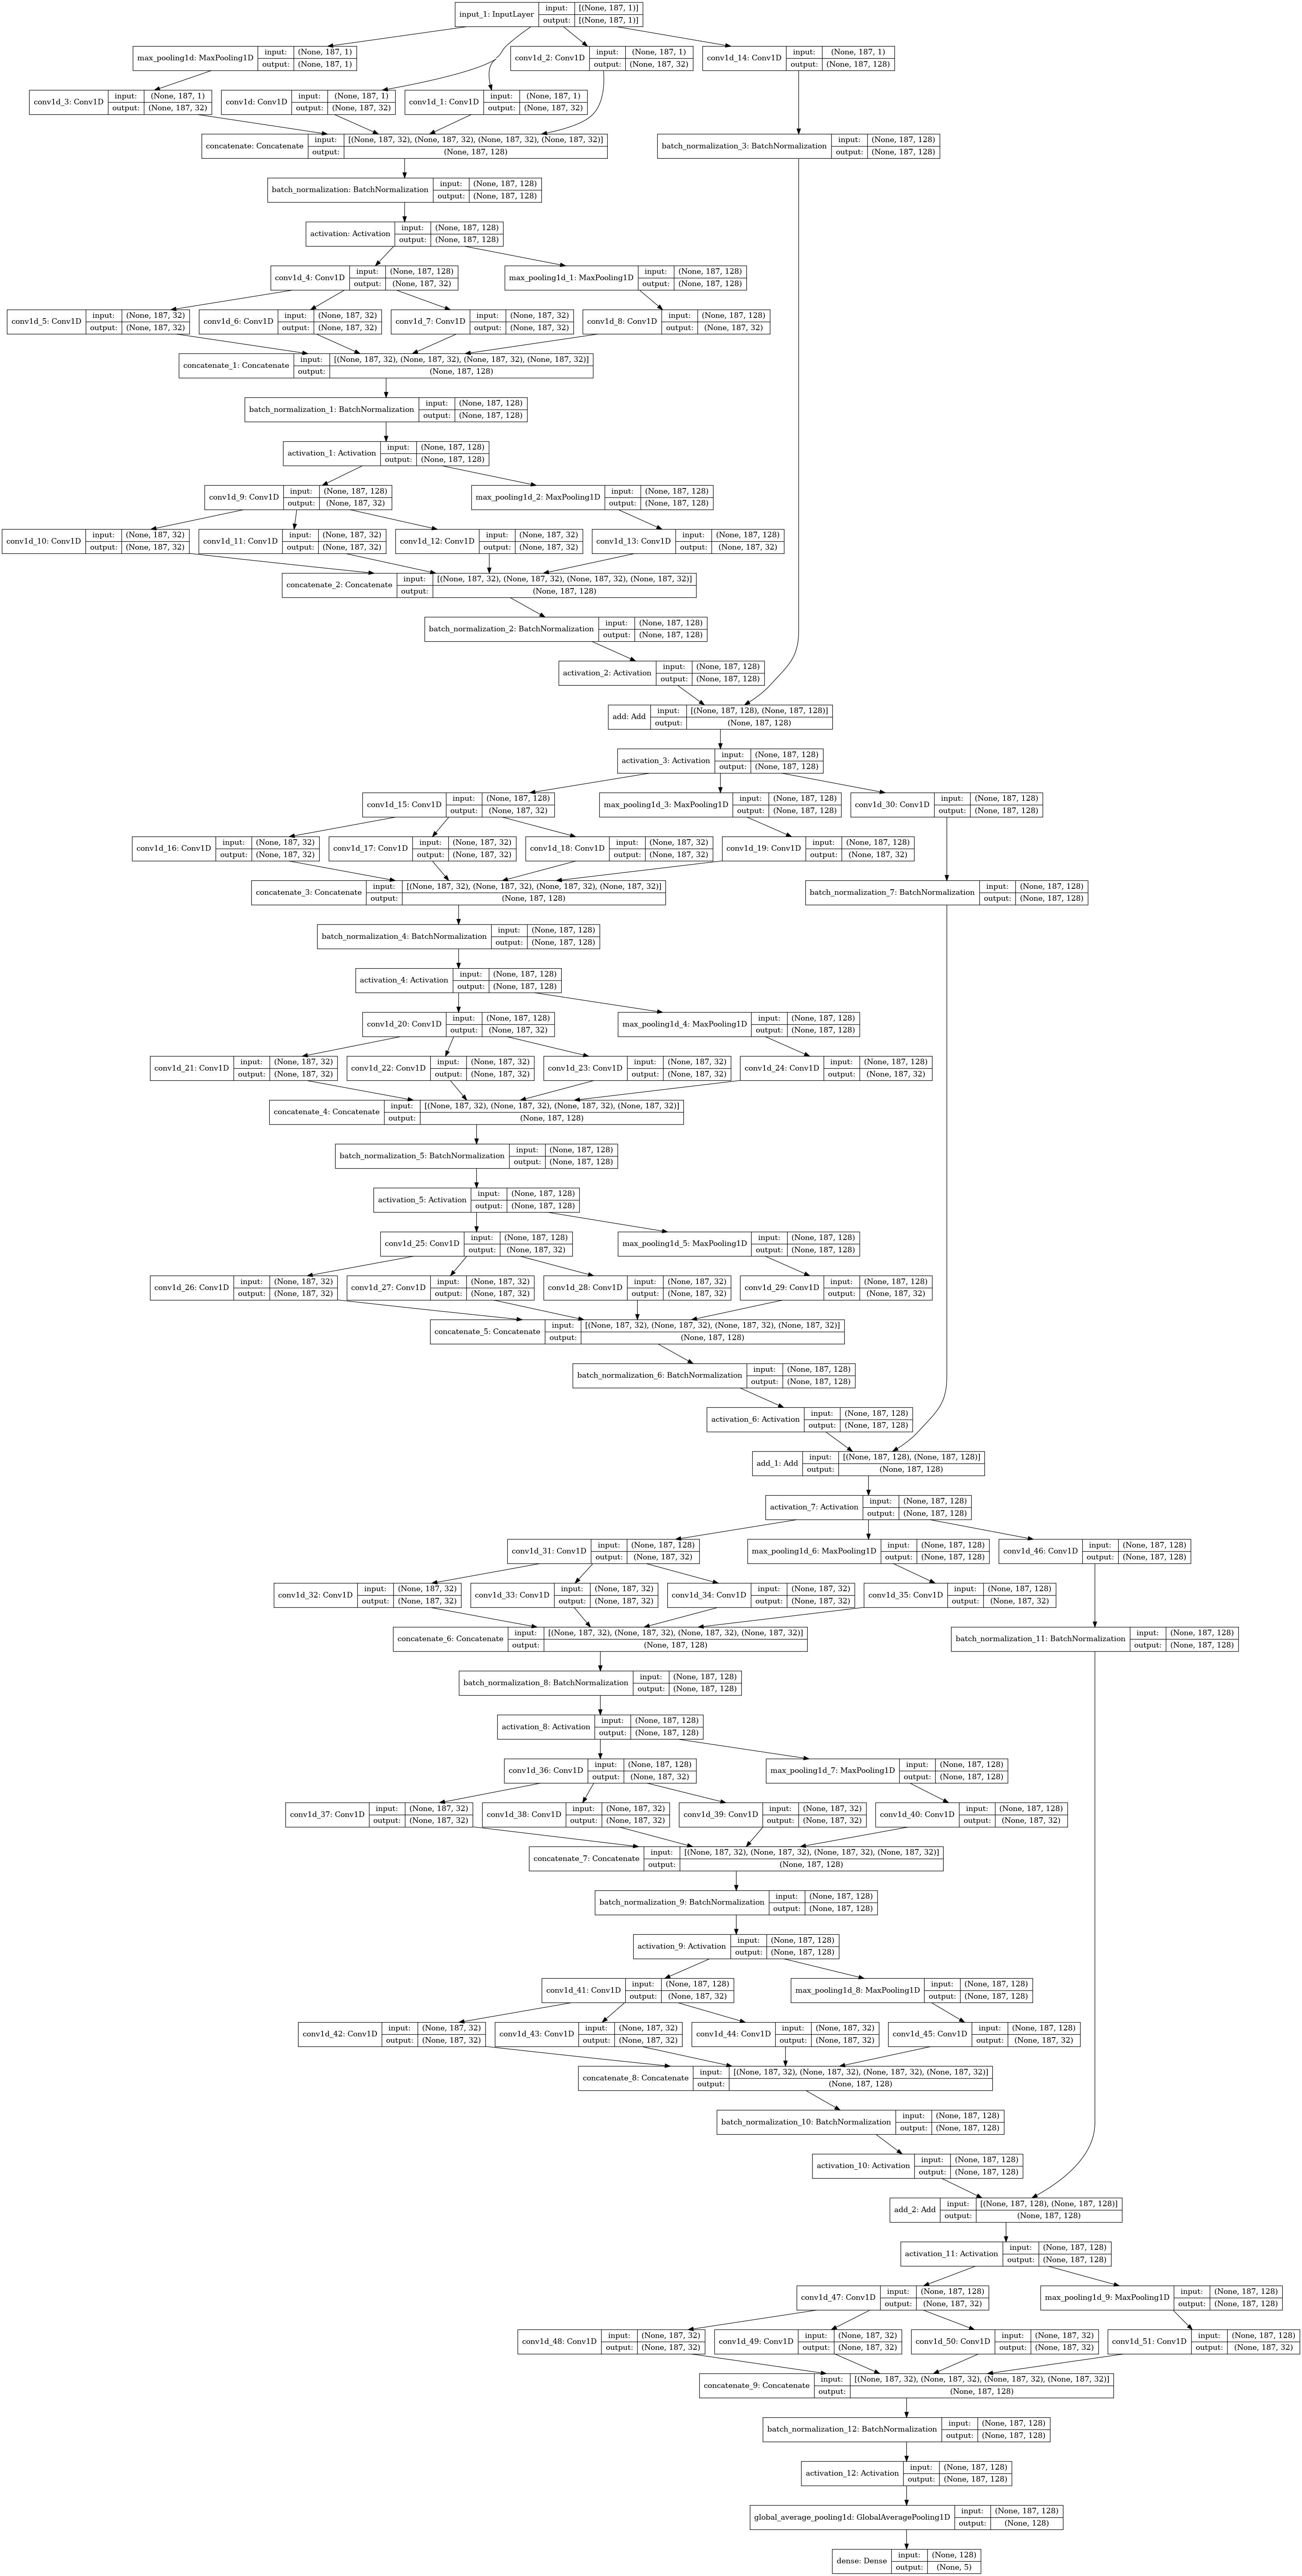

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(inception.model, to_file="model_fig.jpg", show_shapes=True)

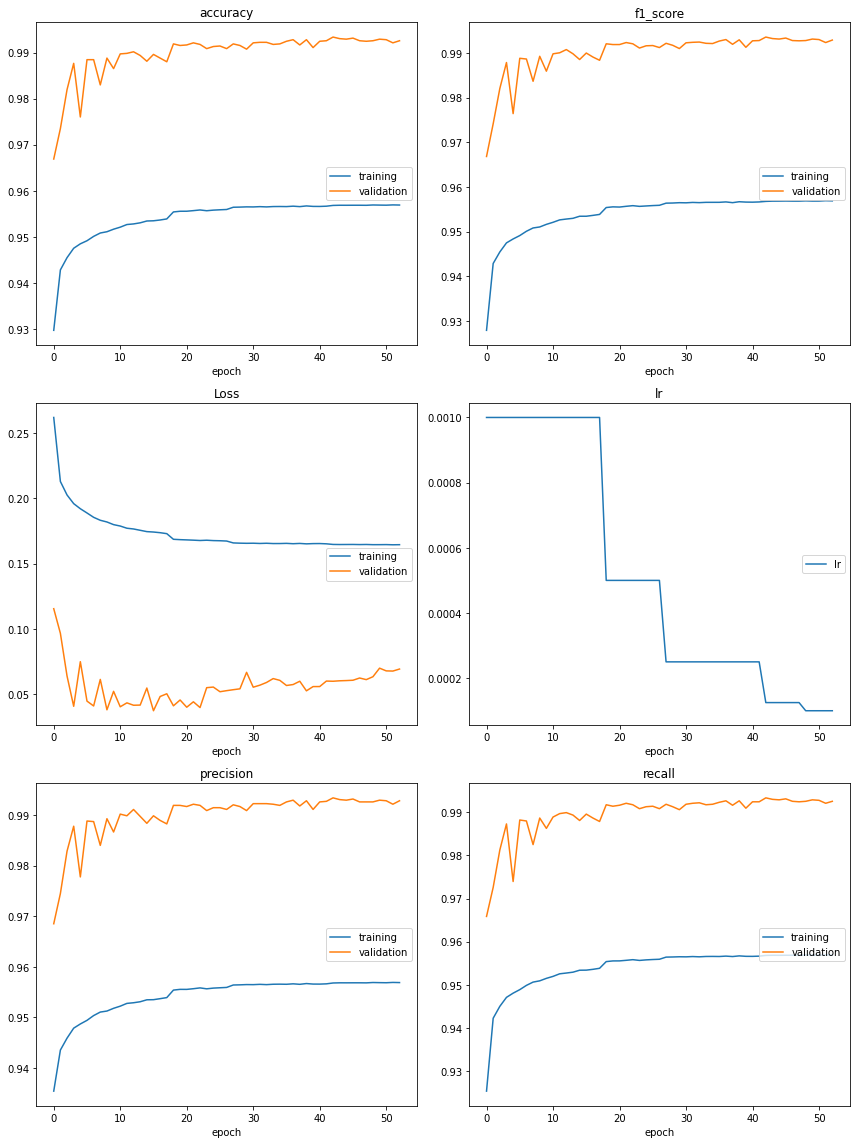

accuracy
	training         	 (min:    0.930, max:    0.957, cur:    0.957)
	validation       	 (min:    0.967, max:    0.993, cur:    0.993)
f1_score
	training         	 (min:    0.928, max:    0.957, cur:    0.957)
	validation       	 (min:    0.967, max:    0.994, cur:    0.993)
Loss
	training         	 (min:    0.164, max:    0.262, cur:    0.164)
	validation       	 (min:    0.037, max:    0.115, cur:    0.069)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
precision
	training         	 (min:    0.935, max:    0.957, cur:    0.957)
	validation       	 (min:    0.969, max:    0.993, cur:    0.993)
recall
	training         	 (min:    0.925, max:    0.957, cur:    0.957)
	validation       	 (min:    0.966, max:    0.993, cur:    0.993)
Epoch 00053: early stopping
Model take 9230.580454587936 S to train 


In [ ]:
history = inception.fit(X_train, y_train, X_val, y_val)

In [ ]:
inception.model.load_weights("./best_weights.h5")

In [ ]:
inception.model.evaluate(X_val, y_val)

274/274 [==============================] - 4s 12ms/step - loss: 0.0599 - accuracy: 0.9934 - precision: 0.9934 - recall: 0.9934 - f1_score: 0.9934


[0.059886835515499115,
 0.9933759570121765,
 0.9933759570121765,
 0.9933759570121765,
 0.9933850169181824]

In [ ]:
inception.model.evaluate(X_test, y_test)

685/685 [==============================] - 8s 12ms/step - loss: 0.0945 - accuracy: 0.9895 - precision: 0.9895 - recall: 0.9895 - f1_score: 0.9895


[0.09446192532777786,
 0.9894939064979553,
 0.9894939064979553,
 0.9894939064979553,
 0.9895073175430298]

In [ ]:
y_hat = inception.model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(list(label_encoder.keys())[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

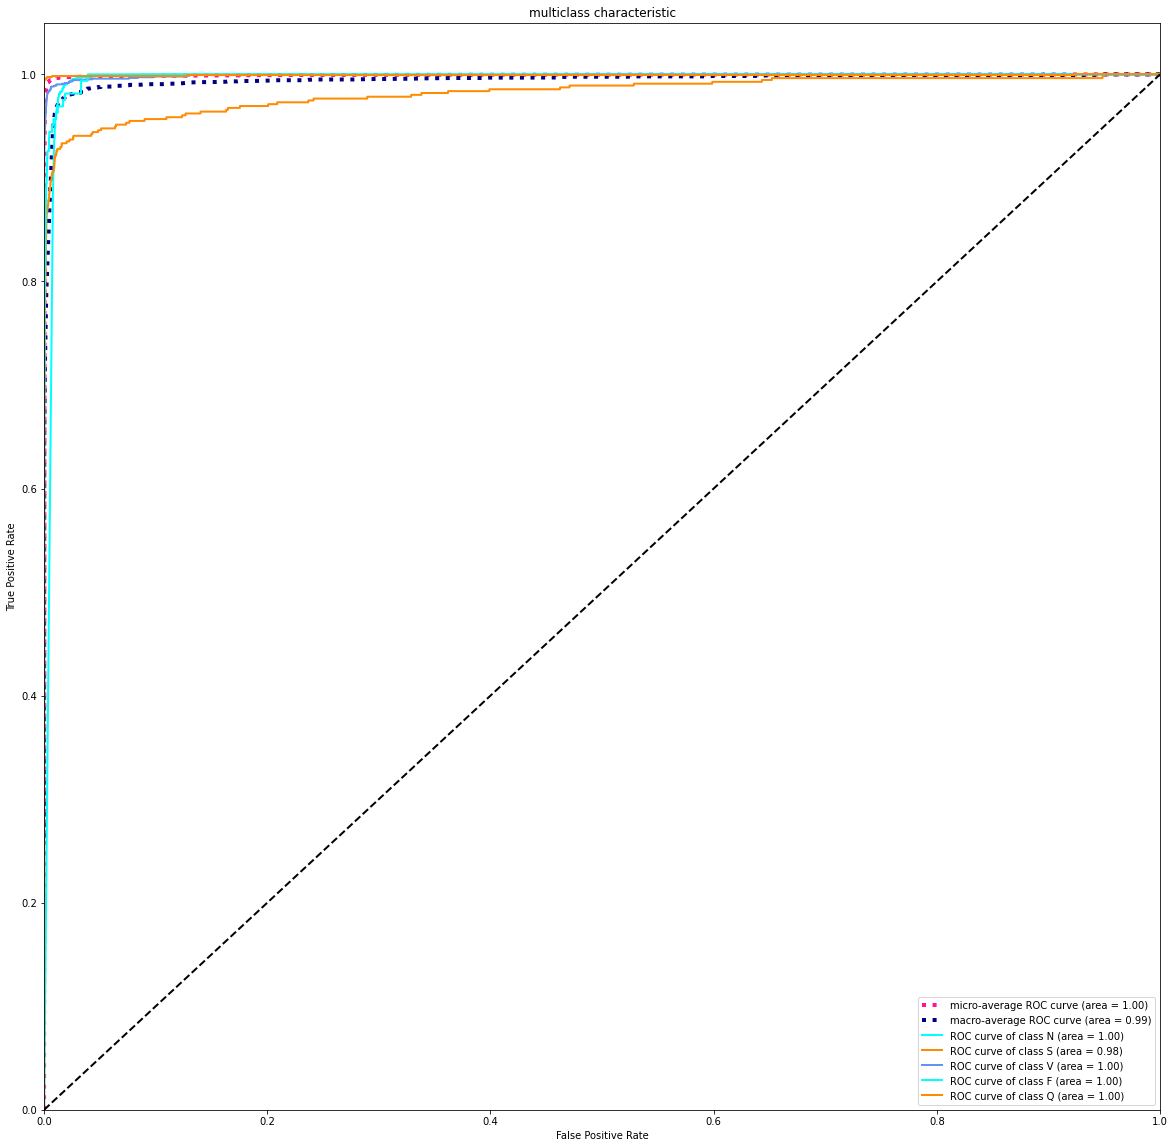

In [ ]:
ROC_plot(y_test, y_hat, Classes_index, nb_classes)

Accuracy:  0.9894938790425726
Precision::  0.9894938790425726
Recall::  0.9894938790425726
F1_Score::  0.9894938790425726

Macro precision_recall_fscore_support (macro) average
(0.9455981879493317, 0.9277527830507865, 0.9359948706270582, None)

Macro precision_recall_fscore_support (micro) average
(0.9894938790425726, 0.9894938790425726, 0.9894938790425726, None)

Macro precision_recall_fscore_support (weighted) average
(0.9893583540499256, 0.9894938790425726, 0.98933850998155, None)

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

           N       0.99      1.00      0.99     18118
           S       0.94      0.83      0.88       556
           V       0.98      0.97      0.97      1448
           F       0.83      0.85      0.84       162
           Q       1.00      0.99      1.00      1608

    accuracy                           0.99     21892
   macro avg       0.95      0.93      0.94     21892
weighted avg       0.99      0.99   

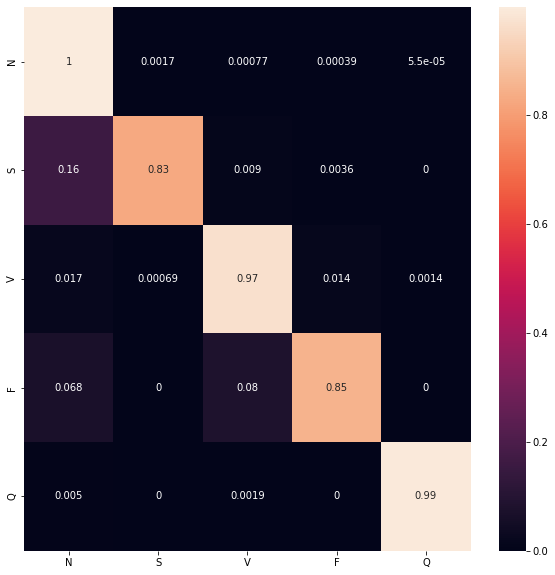

In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)

print_score(y_hat, y_true, Classes_index)